# Super sales Forecasting and Exploratory Data Analysis

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.ticker as ticker


# Reading Excel file 
df=pd.read_excel("super_datastore.xlsx")

# reading first 10 rows
df.head(10)
 

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2011-01-04,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2011-01-08,Standard Class,Texas,Paper,0.2,1,6,0.34,2,16
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2011-01-05,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2011-01-09,Standard Class,Illinois,Binders,0.8,1,-5,-1.55,2,4
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,2011-01-05,CA-2011-112326,60540,Avery 508,Central,...,2011-01-09,Standard Class,Illinois,Labels,0.2,1,4,0.36,3,12
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2011-01-05,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2011-01-09,Standard Class,Illinois,Storage,0.2,1,-65,-0.24,3,273
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2011-01-06,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2011-01-13,Standard Class,Pennsylvania,Art,0.2,1,5,0.25,3,20
5,Office Supplies,Athens,United States,Jack O'Briant,Dixon,2011-01-07,CA-2011-106054,30605,"Dixon Prang Watercolor Pencils, 10-Color Set w...",South,...,2011-01-08,First Class,Georgia,Art,0.0,1,5,0.41,3,13
6,Office Supplies,Los Angeles,United States,Lycoris Saunders,Xerox,2011-01-07,CA-2011-130813,90049,Xerox 225,West,...,2011-01-09,Second Class,California,Paper,0.0,1,9,0.48,3,19
7,Furniture,Henderson,United States,Maria Etezadi,Global,2011-01-07,CA-2011-167199,42420,Global Deluxe High-Back Manager's Chair,South,...,2011-01-11,Standard Class,Kentucky,Chairs,0.0,1,746,0.29,9,2574
8,Office Supplies,Henderson,United States,Maria Etezadi,Rogers,2011-01-07,CA-2011-167199,42420,Rogers Handheld Barrel Pencil Sharpener,South,...,2011-01-11,Standard Class,Kentucky,Art,0.0,1,1,0.27,2,5
9,Office Supplies,Henderson,United States,Maria Etezadi,Ibico,2011-01-07,CA-2011-167199,42420,Ibico Hi-Tech Manual Binding System,South,...,2011-01-11,Standard Class,Kentucky,Binders,0.0,1,274,0.45,2,610


In [3]:
df.describe() # describing data in terms of statistics

,Postal Code,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
count,9994.000000,9994.000000,9994.0,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,0.156203,1.0,28.651891,0.120532,3.789574,229.873324
std,32063.693350,0.206452,0.0,234.255712,0.466923,2.225110,623.248946
min,1040.000000,0.000000,1.0,-6600.000000,-2.750000,1.000000,0.000000
25%,23223.000000,0.000000,1.0,2.000000,0.070000,2.000000,17.000000
50%,56430.500000,0.200000,1.0,9.000000,0.270000,3.000000,54.500000
75%,90008.000000,0.200000,1.0,29.000000,0.360000,5.000000,210.000000
max,99301.000000,0.800000,1.0,8400.000000,0.500000,14.000000,22638.000000


In [22]:
df.isnull().sum() # checking if there is any null value or no

Category             0
City                 0
Country              0
Customer Name        0
Manufacturer         0
Order Date           0
Order ID             0
Postal Code          0
Product Name         0
Region               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Profit Ratio         0
Quantity             0
Sales                0
dtype: int64

In [63]:
#Sorting the top 10 customers
top_customers= df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(10)

# Rounding off the sales value to 2 digit
top_customers=top_customers[["Sales"]].round(2) 

top_customers.reset_index(inplace=True) # Reset the index
top_customers.head(10)

,Customer Name,Sales
0,Sean Miller,25042
1,Tamara Chand,19050
2,Raymond Buch,15117
3,Tom Ashbrook,14596
4,Adrian Barton,14476
5,Ken Lonsdale,14175
6,Sanjit Chand,14145
7,Hunter Lopez,12875
8,Sanjit Engle,12209
9,Christopher Conant,12128


### Top 10 Customers

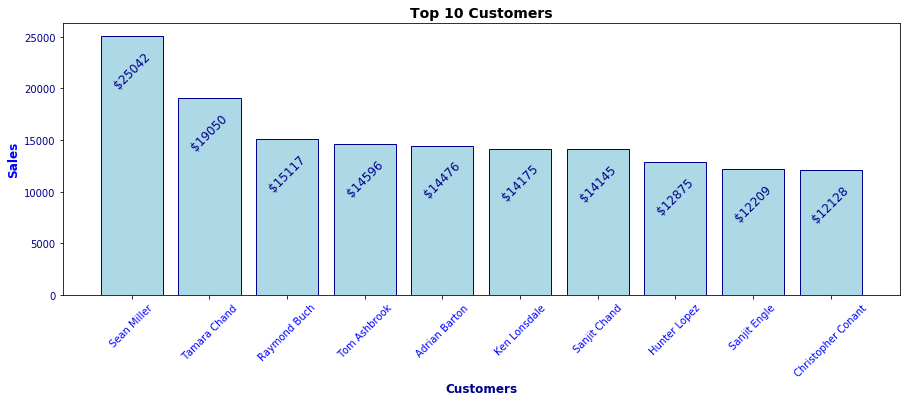

In [24]:
# plotting top customers in a form of bar graph

plt.figure(figsize=(15,5))
plt.title("Top 10 Customers",fontsize=14,fontweight='bold')
plt.bar(top_customers['Customer Name'],top_customers['Sales'],color='lightblue',edgecolor='darkblue')
plt.xlabel("Customers",fontsize=12,fontweight='bold',color='darkblue') # x-axis showing Customers
plt.ylabel("Sales",fontsize=12,fontweight='bold',color='blue') # y axis showing Sales
plt.xticks(rotation=45,color='blue') # making x-axis label in parallel direction
plt.yticks(color='darkblue')

for k,v in top_customers["Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-5000,'$'+ str(v), fontsize=12,rotation=45,color='darkblue', horizontalalignment='center');

### Top 10 States

In [62]:
# top 10 states
top_states=df.groupby(['State']).sum().sort_values(['Sales'],ascending=False).head(10)
top_states.reset_index(inplace=True)

top_states.head(10)

,State,Postal Code,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,California,184382639,145.60,2001,76368,557.52,7667,457731
1,New York,11835721,62.40,1128,74020,336.81,4224,310914
2,Texas,75747693,364.64,985,-25714,-336.76,3724,170187
3,Washington,49661687,32.40,506,33390,139.97,1883,138656
4,Pennsylvania,11190565,192.90,587,-15550,-50.25,2153,116522
5,Florida,12640225,114.65,383,-3412,-6.73,1379,89479
6,Illinois,29873772,191.90,492,-12607,-192.65,1845,80162
7,Ohio,20579836,152.40,469,-16962,-34.37,1759,78253
8,Michigan,12356103,1.80,255,24458,85.02,946,76281
9,Virginia,5124335,0.00,224,18600,74.37,893,70641


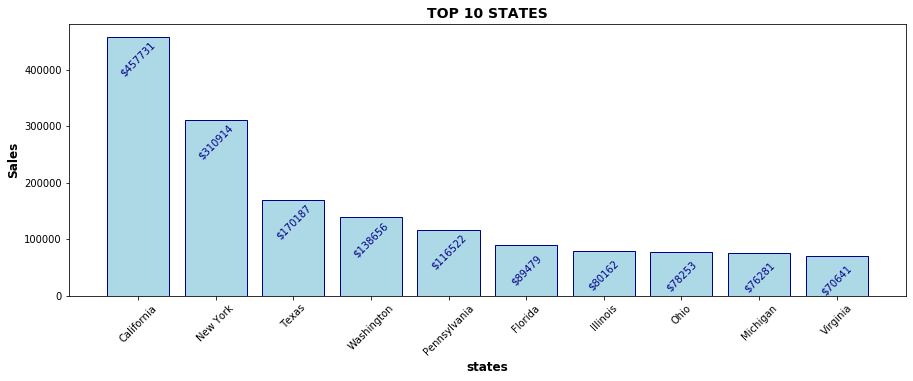

In [26]:
plt.figure(figsize=(15,5))
plt.title("TOP 10 STATES",fontsize=14,fontweight='bold')
plt.xlabel("states",fontsize=12,fontweight='bold')
plt.ylabel("Sales",fontsize=12,fontweight='bold')
plt.bar(top_states['State'],top_states['Sales'],color='lightblue',edgecolor='darkblue')
plt.xticks(rotation=45)

for k,v in top_states['Sales'].items():
    plt.text(k,v-70000,'$'+str(v),horizontalalignment='center',rotation=45,color='darkblue')

### Top 10 Cities

In [61]:
top_cities=df.groupby(['City']).sum().sort_values(['Sales'],ascending=False).head(10)
top_cities.reset_index(inplace=True)
top_cities.head(10)

,City,Postal Code,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,New York City,9168909,51.40,915,62019,271.22,3417,256397
1,Los Angeles,67252887,55.50,747,30439,204.30,2879,175857
2,Seattle,41989758,27.80,428,29144,116.96,1590,119552
3,San Francisco,47998395,34.00,510,17494,149.06,1935,112690
4,Philadelphia,10275302,175.50,537,-13832,-42.93,1981,109085
5,Houston,29052387,143.14,377,-10147,-135.35,1466,64504
6,Chicago,19037248,120.50,314,-6651,-122.23,1132,48540
7,San Diego,15650880,13.60,170,6378,44.55,670,47521
8,Jacksonville,3843200,35.85,125,-2329,1.93,429,44712
9,Springfield,9016357,23.20,163,6198,22.82,649,43052


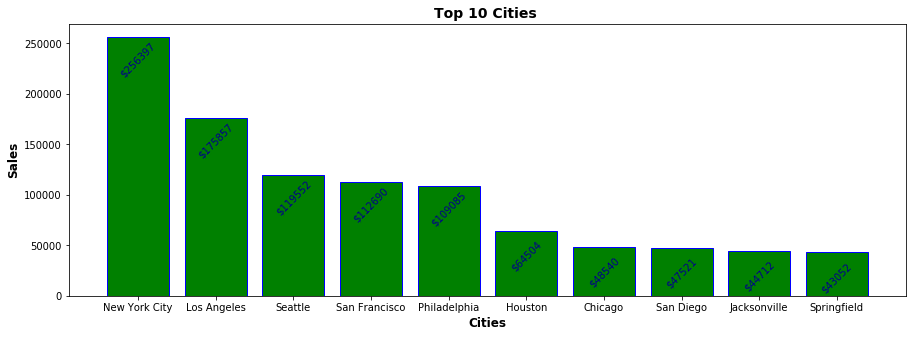

In [28]:
plt.figure(figsize=(15,5))
plt.title("Top 10 Cities ",fontsize=14,fontweight='bold')
plt.xlabel('Cities',fontsize=12,fontweight='bold')
plt.ylabel('Sales',fontsize=12,fontweight='bold')
plt.bar(top_cities['City'],top_cities['Sales'],color='green',edgecolor="blue")
for k,v in top_cities['Sales'].items():
    plt.text(k,v-40000,'$'+str(v),horizontalalignment='center',rotation=45,color='darkblue')

### Top Categories

In [12]:
top_category=df.groupby(['Category']).sum().sort_values(['Sales'],ascending=False)
# Rounding off the sales value to 2 digit
top_category=top_category[["Sales"]].round(2) 
top_category.reset_index(inplace=True)
print(top_category)

          Category   Sales
0       Technology  836221
1        Furniture  742006
2  Office Supplies  719127


([<matplotlib.patches.Wedge at 0x1017d0b0>,
 [Text(-1.0921163985910158, 0.497274342720987, 'Office Supplies'),
  Text(0.19132890153763973, -1.1846489992552225, 'Furniture'),
  Text(0.9988597040878389, 0.6650408194611481, 'Technology')],
 [Text(-0.6370678991780926, 0.2900766999205757, ' $836221'),
  Text(0.1116085258969565, -0.6910452495655465, ' $742006'),
  Text(0.5826681607179058, 0.387940478019003, ' $719127')])

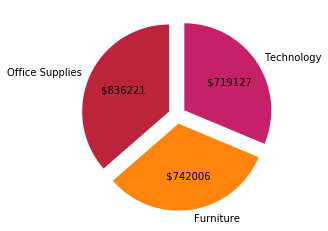

In [13]:

values=df["Category"].value_counts()
labels=df["Category"].unique().tolist()
explode=(0.1,0.1,0.1)



def autopct_format(values): # CALCULATING THE TOTAL REVENUE
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart


fig1, ax1 = plt.subplots()
ax1.pie(top_category['Sales'], colors = colors, labels=labels, autopct= autopct_format(top_category['Sales']), startangle=90,explode=explode)

